In [4]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    'mssql+pyodbc://localhost/Project1?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)
pdf = pd.read_sql('SELECT * FROM machine_prop', engine)
print(pdf.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [6]:
# Drop columns not needed for ML
pdf = pdf.drop(['UDI', 'Product ID' , 'Machine failure', 'TWF', 'HDF', 'OSF', 'RNF'], axis=1)

# Encode 'Type' as dummies
pdf = pd.get_dummies(pdf, columns=['Type'])

In [10]:
from sklearn.model_selection import train_test_split
p_x = pdf.drop(['PWF'],axis = 1)
p_y = pdf['PWF']
px_train, px_test, py_train, py_test = train_test_split(
    p_x, p_y, stratify=p_y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

pclf = RandomForestClassifier(n_estimators=100, random_state=42)
pclf.fit(px_train, py_train)

py_pred = pclf.predict(px_test)
print(classification_report(py_test, py_pred))
print(confusion_matrix(py_test, py_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.94      0.79      0.86        19

    accuracy                           1.00      2000
   macro avg       0.97      0.89      0.93      2000
weighted avg       1.00      1.00      1.00      2000

[[1980    1]
 [   4   15]]


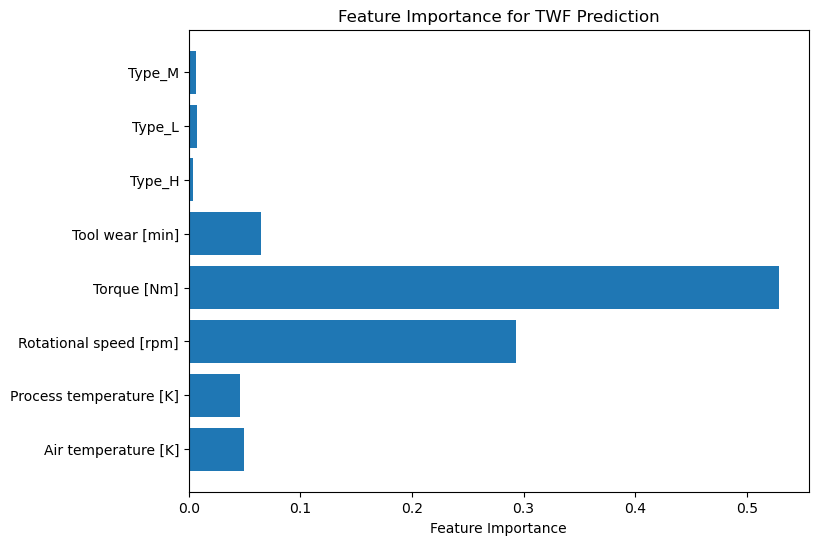

In [19]:
import matplotlib.pyplot as plt

feature_names = px_train.columns
importances = pclf.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for TWF Prediction")
plt.show()
